In [1]:
# 数据变换的种类有很多，用途也比较大，这里主要介绍两种变换的方法，及其变换幂指数的寻找
# 分别是为对称而进行的变换，为直线关系而进行的变换
# 这两种方法都在课程论文用到，具体可以参考文章和相关代码

# 载入数据，定义变量
data <- read.table("/home/shensir/Documents/MyPrograming/R/EDA-Course-WIth-R/paper/brain.txt")
data <- cbind.data.frame(data$V3, data$V2)
colnames(data) <- c("BodyW", "BrainW")

X <- data$BodyW
y <- data$BrainW

X.log <- log(data$BodyW)
y.log <- log(data$BrainW)

opar <- par(no.readonly = TRUE)

[1] 0.008953068

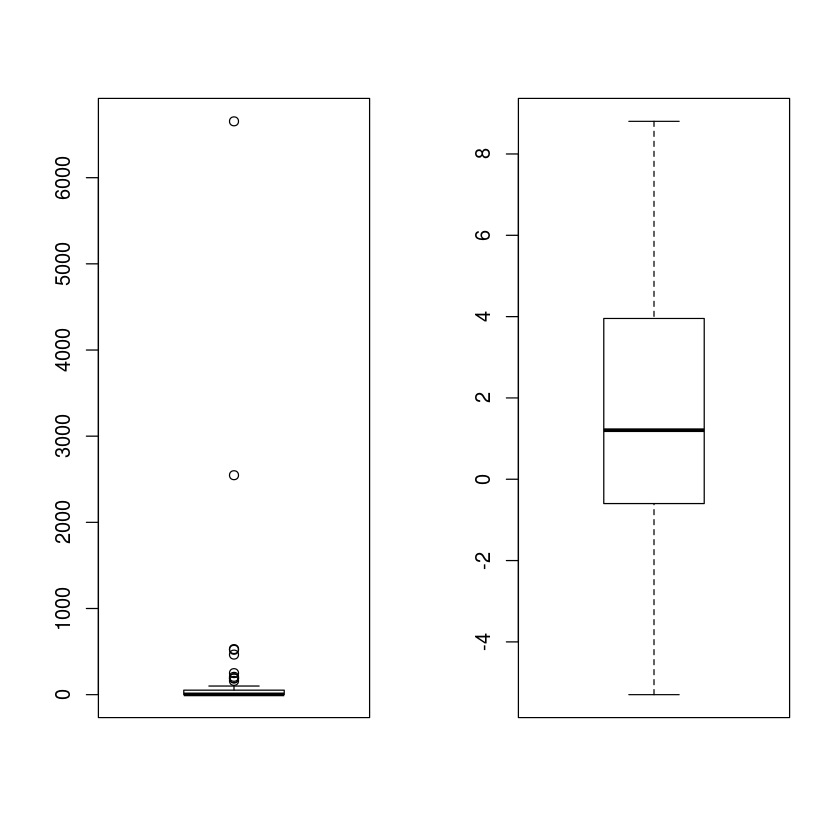

In [6]:
# 为对称进行变换
library(lvplot)
library(dplyr)
# 根据字母值获取变换指数
get.index.bylv <- function(data){
  letter.values <- lvplot::lvtable(data,k=7)
  letter.values <- as.data.frame(letter.values)
  M <- letter.values$LV[7]  # median
  
  letter.values.L <- rev(letter.values$LV[c(1:6)])
  letter.values.U <- letter.values$LV[c(8:13)]
  letter.values.New <- cbind.data.frame(letter.values.L,
                                        letter.values.U)
  rownames(letter.values.New) <- c("F", "E", "D", "C", "B", "A")
  colnames(letter.values.New) <- c("Low","Up")
  # columns calculation
  
  letter.values.New <- mutate(letter.values.New, subM = (Low+Up)/2-M,
                              numDiv = ((Up-M)^2+(M-Low)^2)/(4*M),
                              pvalue = 1-subM/numDiv,
                              index = 1-pvalue)
  # get index
  index.proper <- median(letter.values.New$index)
  return(index.proper)
}

y.index.bylv <- get.index.bylv(y)  # 0.01 -> log
y.index.bylv
# 从变换后的箱线图可以看出变换消除了离群值，分布更加对称
par(mfrow=c(1,2))
boxplot(y)
boxplot(y.log)
par(opar)

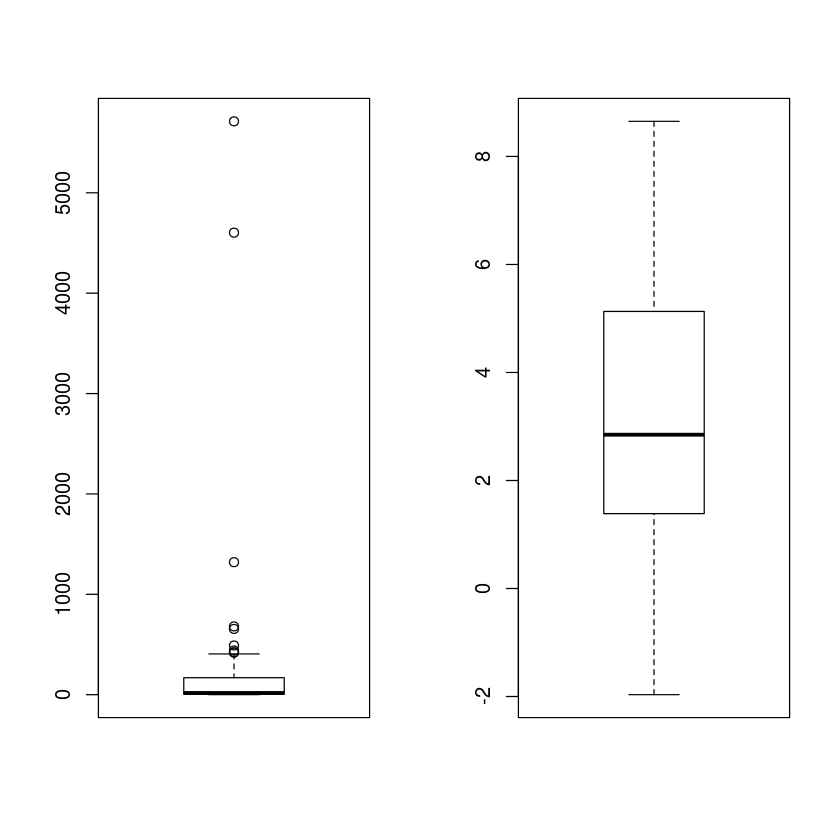

In [9]:
# 为直线性寻求变换的幂指数
library(MASS)
get.e.index <- function(X, y){
  Xm <- median(X)
  ym <- median(y)
  y1 <- y-ym
  X1 <- X-Xm
  f1 <- lqs(y1 ~ X1, method = "lms")
  C <- as.numeric(f1$coefficients[2])
  
  X2 <- C^2*(X-Xm)^2/(2*ym)
  y2 <- y-ym-C*(X-Xm)
  f2 <- lqs(y2~X2, method = "lms")
  #plot(X2, y2)
  #abline(a=as.numeric(f2$coefficients[1]), b=as.numeric(f2$coefficients[2]))
  e.index <- as.numeric(f2$coefficients[2])  
}

# 调换X，y的位置，寻求使得X变换后与y成直线关系
# 注意这里的调换或许是不合适，我们如果接下来做回归要进行进一步的检验
# 对比也能发现变换是合适的
x.e.index <- get.e.index(y.log, X)  # 0 -> log
par(mfrow=c(1,2))
boxplot(X)
boxplot(X.log)
par(opar)

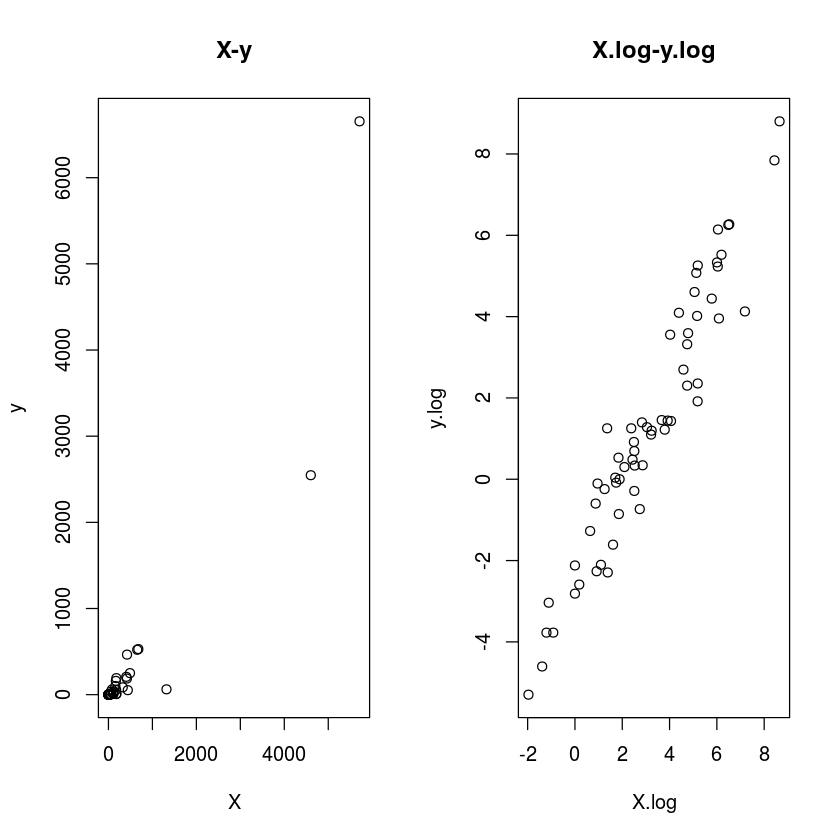

In [11]:
# 书上还提到，变换具有某种“幸运”的性质，就是一种变换可能带来很多良好的性质
# 通过上面的探索，我们发现在两次变换后，两组数据变得间的关系也变得十分明确
par(mfrow=c(1,2))
plot(X,y, main="X-y")
plot(X.log, y.log, main="X.log-y.log")
par(opar)